<a href="https://colab.research.google.com/github/euna-jeong20/hands-on-machine-learning/blob/main/01_%ED%95%9C%EB%88%88%EC%97%90_%EB%B3%B4%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [21]:
def prepare_country_stats(oecd_bli, gdp_per_captita):       #oecd_bli과 gdp_per_capita 데이터 합침
                                                            #oecd_bli는 oecd가 측정한 Better Life Index(더나은 삶 지수)
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')     #pivot은 데이터 프레임을 재구조화 하는 함수

    gdp_per_captita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
    gdp_per_captita.set_index('Country', inplace=True)

    # 두 데이터의 인덱스를 Country로 맞췄기 때문에 합칠 수 있다.
    full_country_stats = pd.merge(left=oecd_bli, right = gdp_per_capita,
                                  left_index=True, right_index=True)
                                    #left_index=True : 왼쪽 DataFrame index로 Join할 경우 True
    full_country_stats.sort_values(by='GDP per capita', inplace=True)

    #대표성이 없는 데이터 제거(예를 들어 gdp는 낮지만 행복도가 낮은 나라)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

* datasets/lifesat 안에서 파일을 읽기

In [4]:
import os
datapath = os.path.join('datasets', 'lifesat', '')

In [5]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
# 매직커멘드         
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# 데이터 다운로드
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):    # csv는 데이터 모아 놓은 것 대부분 엑셀 형식
    print("Downloading", filename)                              # 폴더를 만들어서 데이터를 저장한다
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

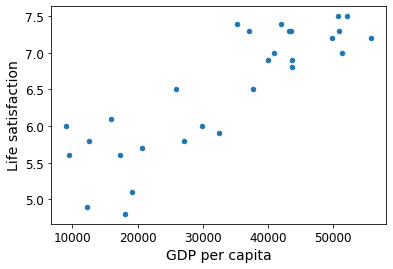

[[5.96242338]]


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

#다운 받은 데이터를 판다스 형태로
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)     #위에서 만든 함수로 두 프레임 수정후 합치기
X = np.c_[country_stats["GDP per capita"]]
#두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
# [1, 2, 3], [4, 5, 6] ----> [ [1, 4], [2, 5], [3, 6] ]
#지금의 식은 1차원 배열을 하나만 넣었기 때문에
# [1, 2, 3] ----> [ [1], [2], [3] ]
#사이킷런에 2차원 배열을 넣어야 해서(2장에서 더 설명)
#country_stats["GDP per capita"].to_numpy().reshape(-1,1)
#reshape(-1,1)은 열은 1로 고정이고 원래 원소수에 따라 행의 수가 정해짐
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화 / 산점도
country_stats.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction')
plt.show()

#선형 모델 선택
model = sklearn.linear_model.LinearRegression() #선형회귀모델

#훈련
model.fit(X, y)

# 키프로스(나라)에 대한 예측
X_new = [[22587]]   #키프로스 1인당 GDP / 리스트의 리스트지만 사이킷런이 자동으로 2차원 넘파이배열로 바꿈
print(model.predict(X_new))     #출력 [[ 5.96242338]]

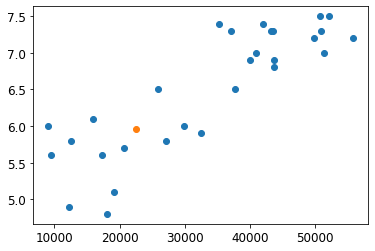

In [23]:
plt.scatter(X, y)
plt.scatter(22587, 5.96)      #키프로스 1인당 GDP와 예측한 삶의 만족도
plt.show()

In [24]:
X_korea = [[31846.22]]      #한국의 바뀐 1인당 GDP
model.predict(X_korea)

array([[6.4171941]])

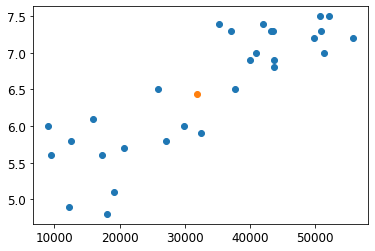

In [25]:
plt.scatter(X, y)
plt.scatter(31846.22, 6.433)    #한국의 1인당 GDP와 예측한 삶의 만족도
plt.show()

In [26]:
country_stats["GDP per capita"]

Country
Russia              9054.914
Turkey              9437.372
Hungary            12239.894
Poland             12495.334
Slovak Republic    15991.736
Estonia            17288.083
Greece             18064.288
Portugal           19121.592
Slovenia           20732.482
Spain              25864.721
Korea              27195.197
Italy              29866.581
Japan              32485.545
Israel             35343.336
New Zealand        37044.891
France             37675.006
Belgium            40106.632
Germany            40996.511
Finland            41973.988
Canada             43331.961
Netherlands        43603.115
Austria            43724.031
United Kingdom     43770.688
Sweden             49866.266
Iceland            50854.583
Australia          50961.865
Ireland            51350.744
Denmark            52114.165
United States      55805.204
Name: GDP per capita, dtype: float64

In [27]:
np.c_[country_stats["GDP per capita"]]

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [33]:
#k-최근접 이웃 회귀 모델사용
import sklearn.neighbors

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

X_new = np.array([[22587.0]])  # 키프로스의 1인당 GDP
print(model.predict(X_new))

[[5.76666667]]


1장 그림코드는 생략